# What is Docker

## Containers and their advantages

A container is a portable computing environment that contains everything needed to run a workflow/application, including dependencies, code and configuration. Containers are like empty computers in which we add the code, then we install all the dependencies and configuration, finally we can create backups of that computer. With that we can use that backups on another computer and everything we installed and configured would work just like it did originally.

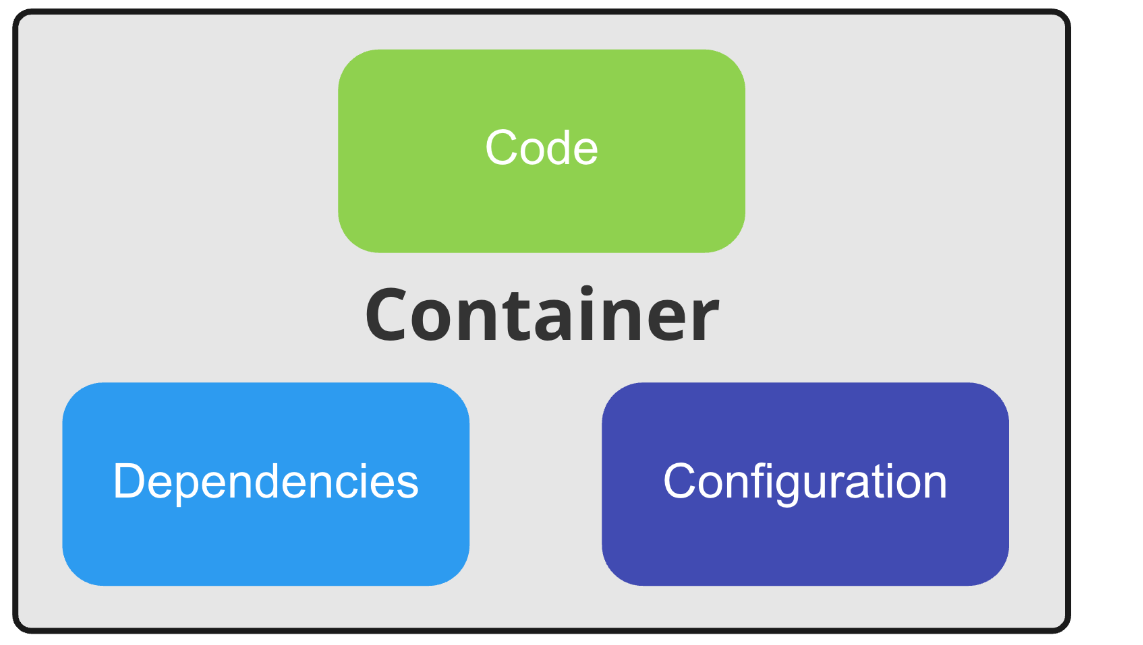

The backups that I mentioned before are similar to a container; both are a packaging of code, dependencies (including the OS) and configuration. One of the main advantages is that containers provide reproducibility, it means that whenever a container is run, the workflow/application it contains will behave identically.

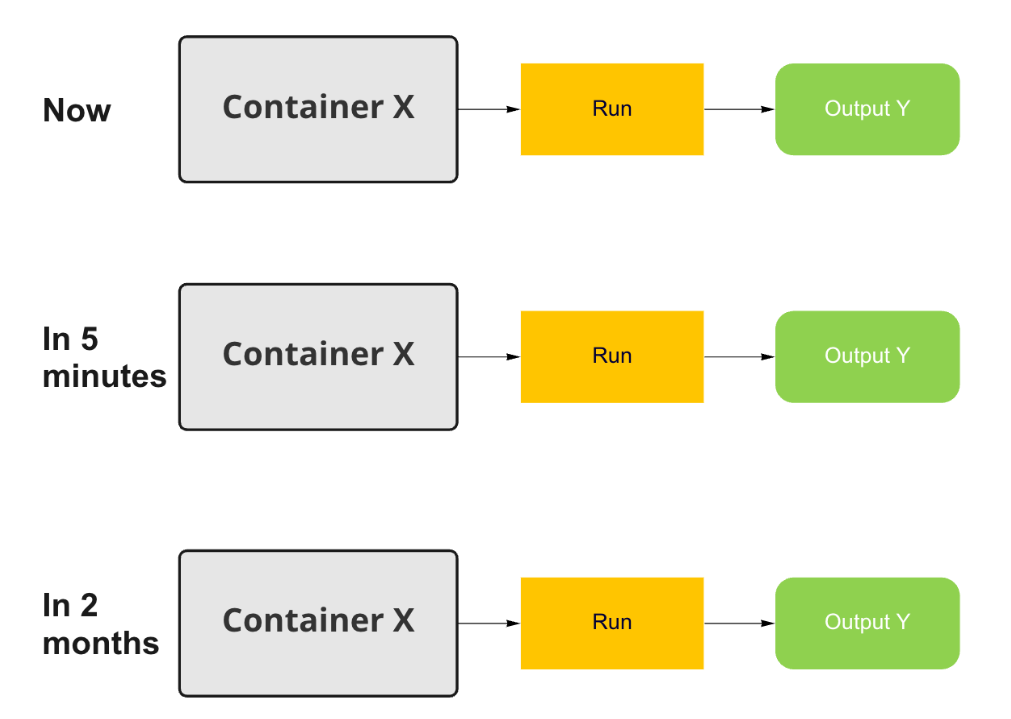

The second main benefit of containers is that wherever a container is run, it will behave identically, so containers provide portability. They eradicate the risk of removed dependencies, lost configuration files, or other changes that could break the application.

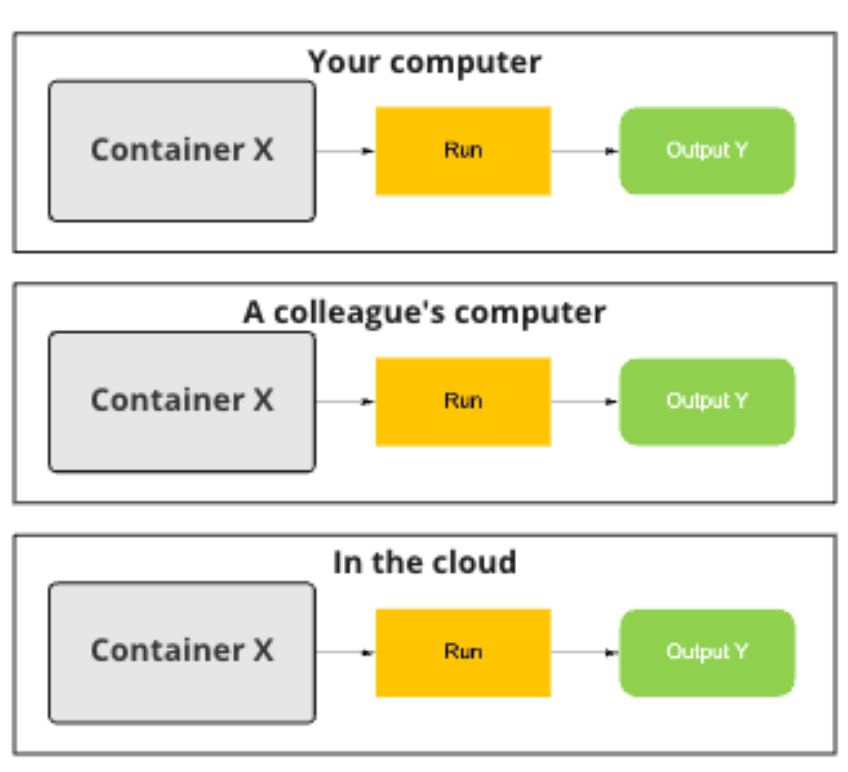

It is achieved because of the isolation between the container and the rest of the environment; running a container will have no impact outside of it and vice versa. A container has limited resource access to the OS it is running on; everything else is kept separate. 

This isolation also helps us to provide security, even if one container is compromised, the other containers on the same host and the host itself remain secure since there is no direct communication between containers. Whatever we modify inside a container will only affect that container and nothing more.

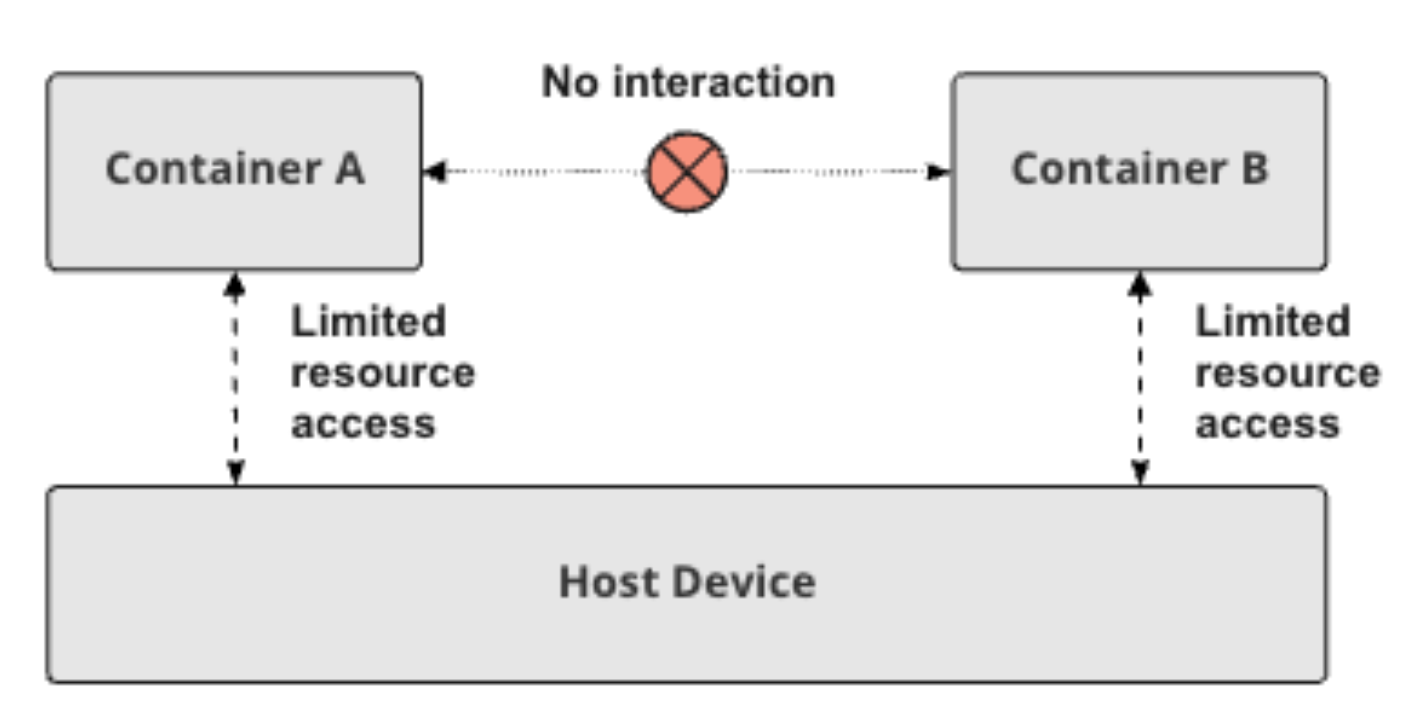

Another big advantage for containers is that they are lightweight. They use a few extra resources in comparison to running an application outside of a container. Containers have little overhead compared to alternatives that also provide isolation. This is relevant when comparing containers to VM's

## Main Advantages for containers

- Security
- Portability
- Reproducibility
- Lightweight


# The Docker Engine

Docker is an open-source tool that allows us to create, run and manage containers. Docker has grown to be part of a large ecosystem of tools around containers like kubernetes (System for container scheduling and management) or docker Compose (Tool for defining and running multi-container Docker applications). 

Docker has a client-server architecture. 

- The client is the command line interface (cli) that we use to talk to the server.
- The Docker engine also includes an API specifications, which define how you can interact with the server. These API's are not only used by the client but also specify how other applications can work with the Daemon.
- The server is a background process that requires no user interaction (that's why it is called a daemon)

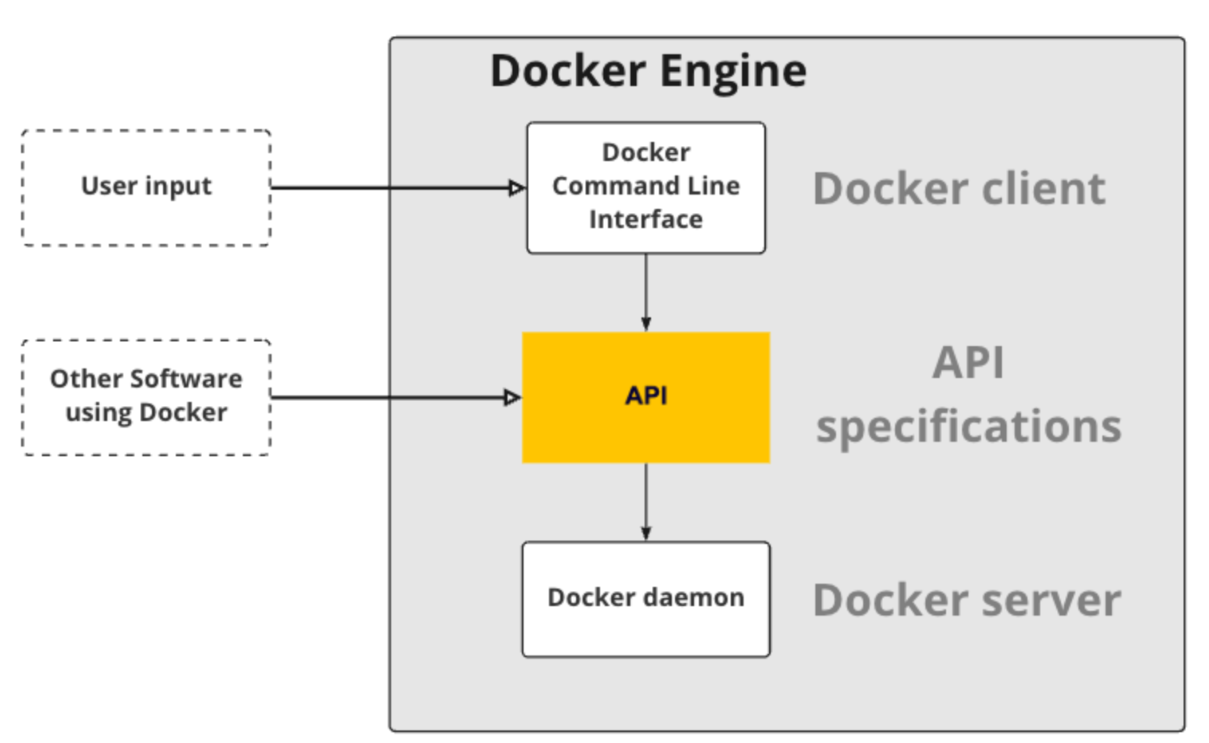

## The Docker Daemon

Is responsible for managing all Docker objects, such as images, containers and more. Keep in mind that in order to indicate the server what to do, we must use a client such as the cli or the Docker Desktop (UI).

### Difference between an image and a container:
- An image is a blueprint, like an idle copy of a hard drive which contains all the software that we want to run.
- A container is a running image, like a copy of the same hard drive but plugged into a computer.
- Images are blueprints, while a container is a running image, the image is just the template it got started from.

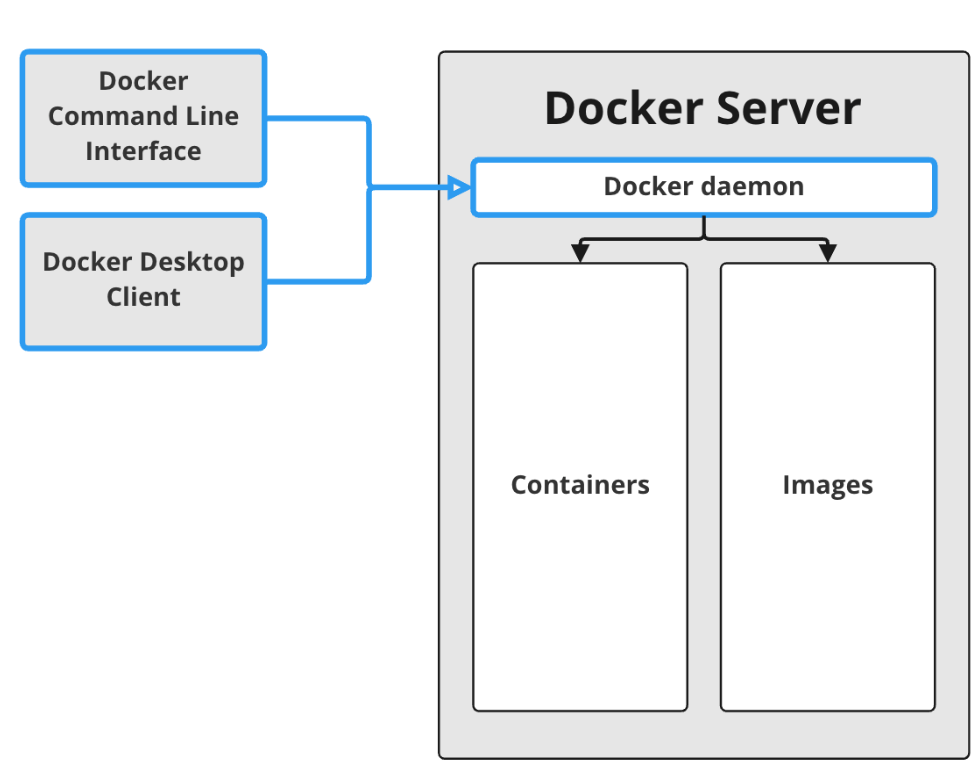

### What is a container

We can think of containers as processes. When we start a container a new process is started in the OS. The main difference between container processes and others is its permissions to resources like the file system, memory and network.

For many resources of a container process, not only is access restricted, but also undetectable to the process. This means that wen we have a running container, it will only have access to a single folder and cannot see files outside of that folder. With that we can now create processes that are isolated from the rest of the machine. 

Containers use their own OS instead of using the host's OS. The Daemon ensures that the OS running in a container is unaware of other containers and the host OS. The OS inside the container can start and manage it's own processes without interfering with the ones running in the host OS.

### Containers vs. standard processes

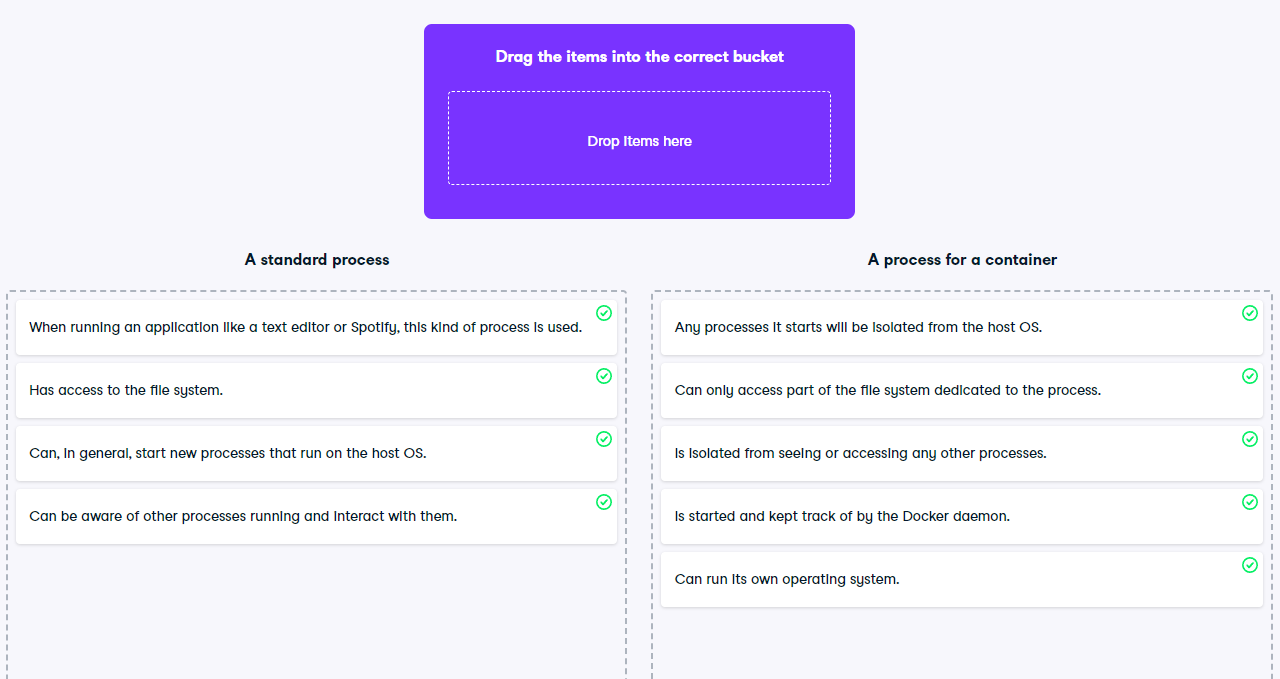

# Containers vs. Virtual Machines (VM's)

Both VM's and containers aim to run software side by side on the same physical machine safely, without interfering to each other. In order to achive this goal we must talk about virtualization.

## Virtualization

It means that resources like RAM, CPU, ord Disk can be split up and look like separate resources to the software using them. With virtualization each piece of software has it's own resources so they can't interfere with other parts or software components. Both containers and VM's are virtualization technologies.

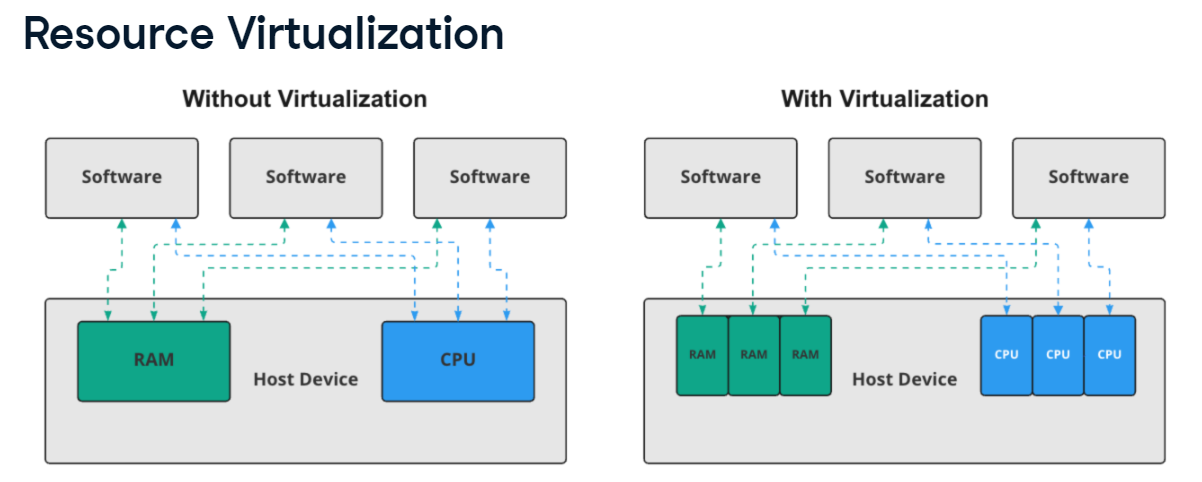

The main difference between VM's and containers is that the VM's virtualize the entire machine down to the hardware while containers virtualize in a software layer above the OS level. This means that separation in VMs is better as only the hardware remains shared while for containers the host OS is also sheared.

A drawback of containers is that there is always a possibility for attackers to get access to the host OS, once they have gotten access to the host OS, which would give them access to all containers running on the same machine. The risk of attackers accessing the host is limited when using and industry-standard container provider.

## Advantages of using containers

1. Their size in memory and on disk is lighter than VMs. Containers require less RAM and less disk space
2. They are significantly smaller because they only need to include a small part of the full OS.
3. Easier to start and stop
4. Faster to distribute, change or update data.
5. VMs can easily become heavy in storage size, VM's are built from scratch for every use case.

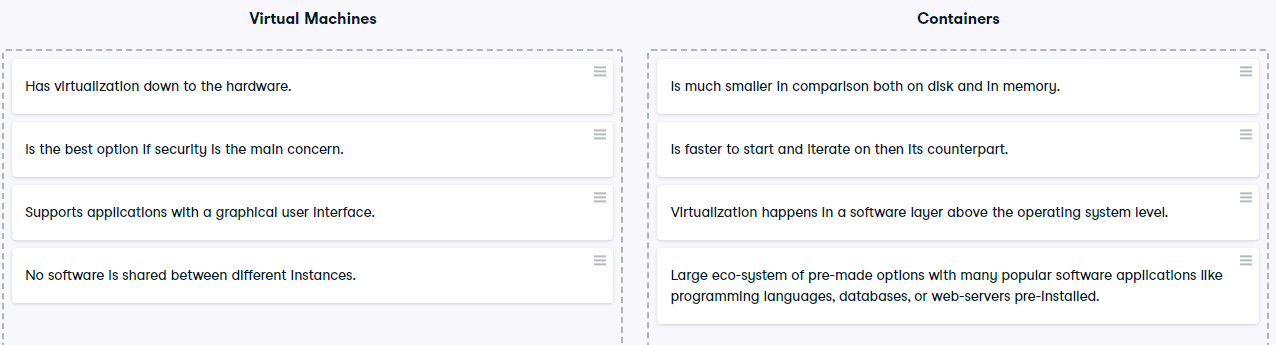




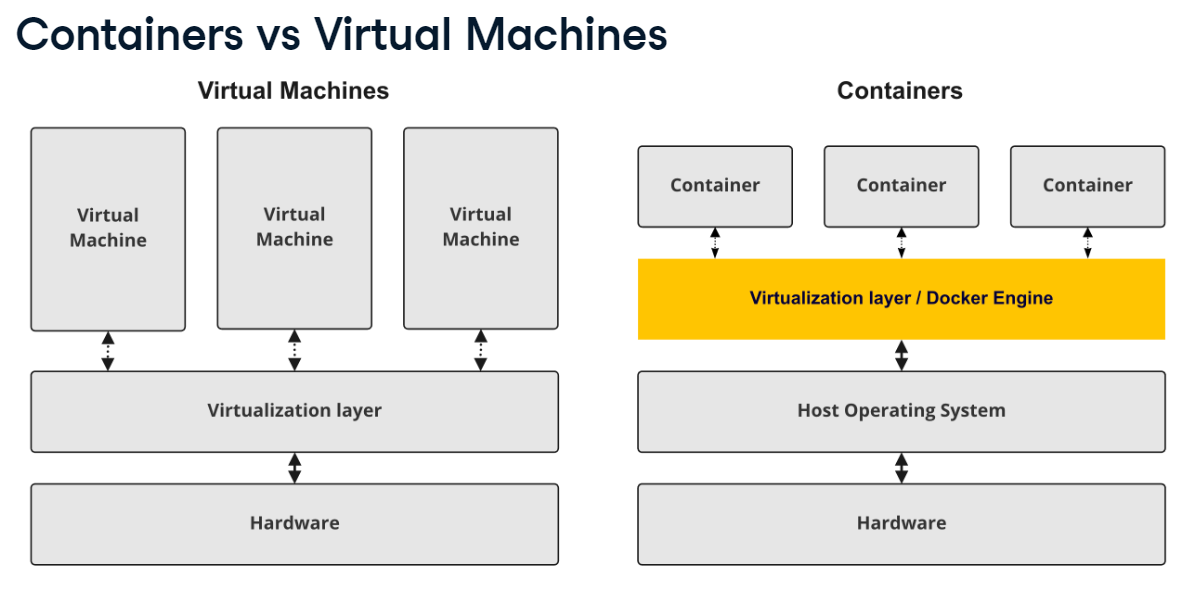